**ML-1. Линейная регрессия**

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [2]:
# В sklearn есть БД с информацией о домах бостона
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


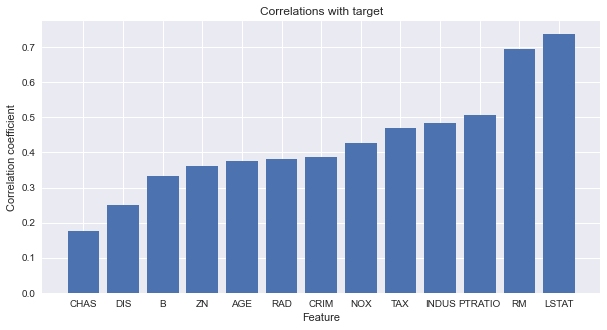

In [4]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

In [5]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


Примечание. Двойные квадратные скобки boston_data[['LSTAT']] позволяют выбрать признак из DataFrame, сохранив его в виде таблицы. Это важно, так как в формуле МНК Х — это матрица.

In [6]:
def linear_regression(X, y):
    # Vector 0
    ones = np.ones(X.shape[0])
    # Добавление нулевого вектора
    X = np.column_stack([ones, X])
    # Вычисление обратной матрицы
    Q = np.linalg.inv(X.T @ X)
    # Вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [7]:
w = linear_regression(X, y)
display(w)


array([34.55384088, -0.95004935])

In [8]:
def plot_regression_2D(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # Диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # Линейный график
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=10)

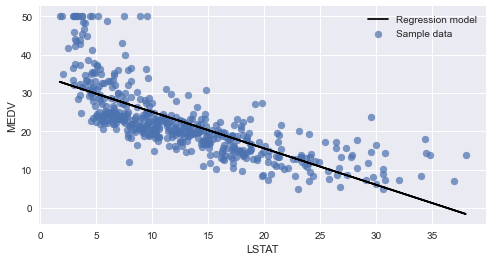

In [9]:
# Предсказание для всех объектов
y_predict = w[0] + w[1]*X

plot_regression_2D(X, y, y_predict)

Аналитическое решение с помощью SKLEARN

In [10]:
from sklearn import linear_model

In [11]:
lr_stat = linear_model.LinearRegression()

lr_stat.fit(X, y)

display(f'w0 = {lr_stat.intercept_}')
display(f'w1 = {lr_stat.coef_}')

'w0 = 34.55384087938311'

'w1 = [-0.95004935]'

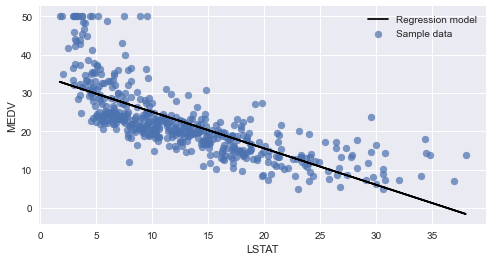

In [12]:
lr_stat.predict(X)

plot_regression_2D(X, y, y_predict)

Выполним обучение модели для всех признаков

In [13]:
features = boston_data.drop('MEDV', axis=1).columns

X = boston_data[features]
y = boston_data['MEDV']

lr_full = linear_model.LinearRegression()
lr_full.fit(X, y)


LinearRegression()

In [14]:
w_df = pd.DataFrame({'Features':features, 'Coefficients':lr_full.coef_})
intercept_df = pd.DataFrame({'Features':['INTERCEPT'], 'Coefficients':lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Text(0, 0.5, 'Model')

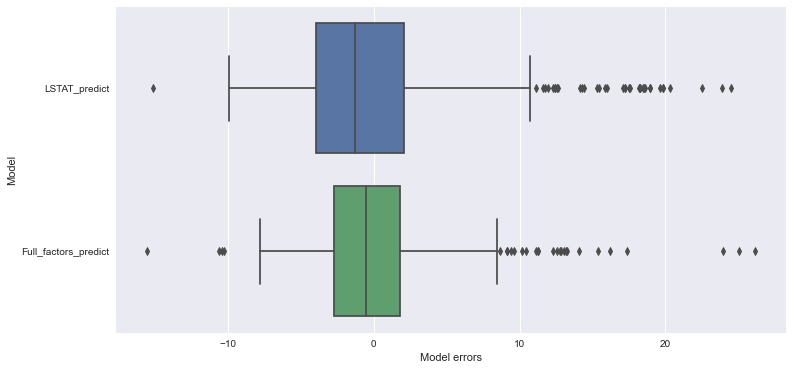

In [15]:
# Визуализация ошибки моделей (для сравнения)
fig, ax = plt.subplots(figsize=(12,6))
y_errors_lsat = y - lr_stat.predict(boston_data[['LSTAT']])
# Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])

errors_df = pd.DataFrame(
    {'LSTAT_predict':y_errors_lsat,
     'Full_factors_predict':y_errors_full
     }
)

sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model')

In [18]:
a = np.array([0.35114,
             0.00000,
             7.38000,
             0.00000,
             0.49300,
             6.04100,
             49.90000,
             4.72110,
             5.00000,
             287.00000,
             19.60000,
             396.90000,
             7.70000])

In [28]:
res = a @ lr_full.coef_ + lr_full.intercept_
display(round(res, 2))

22.87

In [77]:
data = pd.read_csv('data/50_Startups.csv')

In [78]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
X = data.drop(['State', 'Profit'], axis=1)
y = data['Profit']

In [81]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [82]:
lin_reg.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [83]:
ones = np.ones(X.shape[0])
X_1 = np.column_stack([ones, X])
Q = np.linalg.inv(X_1.T @ X_1)
w = Q @ X_1.T @ y